Naive Matrix Multiplication

In [62]:
import numpy as np

#A function that takes two input arrays and performs a matrix multiplication using the naive method
def multiply_naive(A, B):
    #Check arrays have the correct dimensions to perform matrix multiplication
    if len(A[0]) != len(B):
        raise ValueError("Error: Matrix dimensions are not compatible")

    A = np.array(A)
    B = np.array(B)
    
    #Create an empty array to store the result of the matrix multiplication
    C = np.zeros((len(A), len(B[0])))

    #Perform the matrix multiplication
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                #Update each element of the result matrix
                C[i][j] += A[i][k] * B[k][j]
            # C[i][j] = np.sum(np.multiply(A[i,:], B[:,j]))
                
    return C


Unit tests

In [2]:
import unittest
import itertools

#Unit tests for the naive matrix multiplication function
class TestMatrixMultiply(unittest.TestCase):
    def test_multiply_naive(self):
        for m,n,p in itertools.product(range(1, 8),repeat=3):
            A = np.random.rand(m, n)
            B = np.random.rand(n, p)
            
            M = multiply_naive(A, B)

            self.assertTrue(np.allclose(M, np.matmul(A,B)))

unittest.main(argv=[''], verbosity=2, exit=False)

test_multiply_naive (__main__.TestMatrixMultiply) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.070s

OK


Strassen Matrix Multiplication

In [66]:
import numpy as np
import math as m

def multiply_strassen(A, B, first_iteration=True):
    #At the first level of recursion we pad the matrices to ensure 
    #they are both square, have the same dimensions, and that those
    #dimensions are a power of 2.
    if first_iteration:
        #Ensure that we are working with numpy arrays. This is not needed
        #at deeper levels of recursion as only numpy arrays are passed as input
        A = np.array(A)
        B = np.array(B)
        
        #For non-square matrices we will need to slice the final matrix by the 
        #appropriate dimensions to give the correct output. At deeper levels of recursion
        #we already ensure that the input atrices are square
        output_row_dim = len(A)
        output_col_dim = len(B[0])

        if len(A[0]) != len(B):
            raise ValueError("Matrices must be m*n and n*p to multiply")
        
        #Find the largest dimension of the two input matrices and pad all dimensions to the 
        #nearest power of 2 that is >= that dimension
        max_dim = max(len(A),len(A[0]),len(B),len(B[0]))
        exponent = np.log2(max_dim)
        power = int(m.ceil(exponent))

        #If the length of the matrix is not a power of 2, pad it with zeros
        if len(A) != 2**power or len(A[0]) != 2**power:
            A = np.pad(A, ((0, 2**power-len(A)), (0, 2**power-len(A[0]))), 'constant', constant_values=(0))
        if len(B) != 2**power or len(B[0]) != 2**power:
            B = np.pad(B, ((0, 2**power-len(B)), (0, 2**power-len(B[0]))), 'constant', constant_values=(0))

    #Base case
    n = len(A)
    if n <= 45:
        C = multiply_naive(A, B)

    #Recursive case
    else:
        #Split both matrices into 4 quadrants
        A11 = A[0:n//2, 0:n//2]
        A12 = A[0:n//2, n//2:n]
        A21 = A[n//2:n, 0:n//2]
        A22 = A[n//2:n, n//2:n]

        B11 = B[0:n//2, 0:n//2]
        B12 = B[0:n//2, n//2:n]
        B21 = B[n//2:n, 0:n//2]
        B22 = B[n//2:n, n//2:n]

        #Apply Strassen's method
        M1 = multiply_strassen(A11 + A22, B11 + B22, False)
        M2 = multiply_strassen(A21 + A22, B11, False)
        M3 = multiply_strassen(A11, B12 - B22, False)
        M4 = multiply_strassen(A22, B21 - B11, False)
        M5 = multiply_strassen(A11 + A12, B22, False)
        M6 = multiply_strassen(A21 - A11, B11 + B12, False)
        M7 = multiply_strassen(A12 - A22, B21 + B22, False)

        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6

        #Fill empty array with the four 'quadrant' results of the previous method
        C = np.zeros((n,n))
        C[0:n//2, 0:n//2] = C11
        C[0:n//2, n//2:n] = C12
        C[n//2:n, 0:n//2] = C21
        C[n//2:n, n//2:n] = C22

    #If this is a recursive case then just return C as the calling function
    #will be expecting a square matrix
    if not first_iteration:
        return C
    
    #Slice the final matrix according to the original input dimensions of A and B
    return C[:output_row_dim, :output_col_dim]

In [56]:
import unittest

#Unit tests for the above functions
class Test(unittest.TestCase):
    def test_multiply_strassen(self):
        for m,n,p in itertools.product(range(1, 8),repeat=3):
            A = np.random.rand(m, n)
            B = np.random.rand(n, p)
            
            M = multiply_strassen(A, B)

            self.assertTrue(np.allclose(M, np.matmul(A,B)))

unittest.main(argv=[''], verbosity=2, exit=False)

test_multiply_strassen (__main__.Test) ... ok
test_multiply_naive (__main__.TestMatrixMultiply) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.389s

OK


Strassen:  LinregressResult(slope=2.645303551561603, intercept=-12.125419617758759, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)
Naive:  LinregressResult(slope=3.0206152842222314, intercept=-13.653966578843834, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)


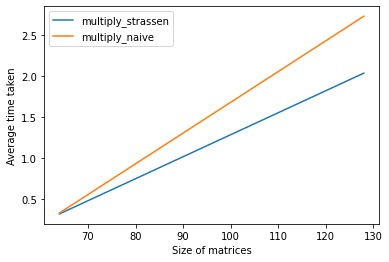

In [78]:
import time
import matplotlib.pyplot as plt
import scipy.stats as stats

#A function that takes a function f and args as input and times how long on average it takes f(args) to execute
def time_function(f, args):
    #Run the function f(*args) 10 times and store the time taken
    times = []
    for i in range(4):
        start = time.time()
        f(*args)
        end = time.time()
        times.append(end - start)
        
    #Return the average time taken
    return np.mean(times)

#Using the time_function create a plot of how long it takes multiply_naive to execute for different sized matrices A and B
def time_function_2D(f, sizes):
    #Create an array to store the average time taken for each size
    times = []
    
    #For each size, create a matrix A and B of that size and time how long it takes to execute f(A, B)
    for size in sizes:
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)
        times.append(time_function(f, [A, B]))
    
    return sizes, times

sizes, times = time_function_2D(multiply_strassen, [2**i for i in np.arange(6, 8, 1)])
plt.plot(sizes, times, label="multiply_strassen")
# plt.plot(sizes, np.log(times), label="multiply_strassen_log")
print("Strassen: ", stats.linregress(np.log(sizes), np.log(times)))

#Plot the average time taken against the size of the matrices
sizes, times = time_function_2D(multiply_naive, [2**i for i in np.arange(6, 8, 1)])
plt.plot(sizes, times, label="multiply_naive")
# plt.plot(sizes, np.log(times), label="multiply_naive_log")
print("Naive: ", stats.linregress(np.log(sizes), np.log(times)))

plt.xlabel("Size of matrices")
plt.ylabel("Average time taken")


plt.legend()
plt.show()



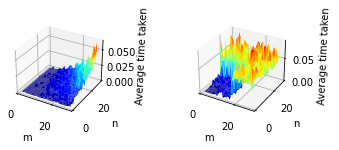

In [33]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

#Using the time_function create a 3D plot of how long it takes for numpy mulmat to execute matrix A with dimensions m,n and matrix B with dimensions n,m for different values of m and n
def time_function_3D(f, label=""):
    #Create an array of different sizes to test
    # m_list = [2**i for i in range(0, 3)]
    # n_list = [2**i for i in range(0, 3)]
    m_list = range(1,30,1)
    n_list = range(1,30,1)
    # m_list = range(1,10,1)
    # n_list = range(1,10,1)

    #Create an array to store the average time taken for each size
    times = []
    dimensions_m = []
    dimensions_n = []
    
    #For each size, create a matrix A and B of that size and time how long it takes to execute f(A, B)
    for m in m_list:
        for n in n_list:
            A = np.random.rand(m, n)
            B = np.random.rand(n, m)
            times.append(time_function(f, [A, B]))
            dimensions_m.append(m)
            dimensions_n.append(n)

    return dimensions_m, dimensions_n, times

#Plot in 3d the average time taken as the dimensions m and n vary
fig = plt.figure()
ax_0 = fig.add_subplot(221, projection='3d')
ax_1 = fig.add_subplot(222, projection='3d')


dimensions_m, dimensions_n, times = time_function_3D(multiply_naive, "multiply_naive")
ax_0.plot_trisurf(dimensions_m, dimensions_n, times, cmap=cm.jet, vmin=0, vmax=np.max(times))
ax_0.set_xlabel('m')
ax_0.set_ylabel('n')
ax_0.set_zlabel('Average time taken')

dimensions_m, dimensions_n, times = time_function_3D(multiply_strassen, "multiply_strassen")
ax_1.plot_trisurf(dimensions_m, dimensions_n, times, cmap=cm.jet, vmin=0, vmax=np.max(times))
ax_1.set_xlabel('m')
ax_1.set_ylabel('n')
ax_1.set_zlabel('Average time taken')

plt.show()

